In [32]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import re 

import scipy.stats as stats  

%matplotlib inline 

sns.set(style = "ticks")

from dateutil.relativedelta import relativedelta
from stldecompose import decompose, forecast

In [33]:
df = pd.read_csv('Tractor-Sales.csv')

In [34]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [35]:
df.shape

(144, 2)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [37]:
df.isnull().sum()

Month-Year                0
Number of Tractor Sold    0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df.columns = [i.replace('-', '_')  for i in df.columns]

In [41]:
df.columns = [i.replace(' ', '_')  for i in df.columns]

In [42]:
df.columns

Index(['Month_Year', 'Number_of_Tractor_Sold'], dtype='object')

In [43]:
df.head()

,Month_Year,Number_of_Tractor_Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [46]:
df.Month_Year

0      Jan-03
1      Feb-03
2      Mar-03
3      Apr-03
4      May-03
5      Jun-03
6      Jul-03
7      Aug-03
8      Sep-03
9      Oct-03
10     Nov-03
11     Dec-03
12     Jan-04
13     Feb-04
14     Mar-04
15     Apr-04
16     May-04
17     Jun-04
18     Jul-04
19     Aug-04
20     Sep-04
21     Oct-04
22     Nov-04
23     Dec-04
24     Jan-05
25     Feb-05
26     Mar-05
27     Apr-05
28     May-05
29     Jun-05
30     Jul-05
31     Aug-05
32     Sep-05
33     Oct-05
34     Nov-05
35     Dec-05
36     Jan-06
37     Feb-06
38     Mar-06
39     Apr-06
40     May-06
41     Jun-06
42     Jul-06
43     Aug-06
44     Sep-06
45     Oct-06
46     Nov-06
47     Dec-06
48     Jan-07
49     Feb-07
50     Mar-07
51     Apr-07
52     May-07
53     Jun-07
54     Jul-07
55     Aug-07
56     Sep-07
57     Oct-07
58     Nov-07
59     Dec-07
60     Jan-08
61     Feb-08
62     Mar-08
63     Apr-08
64     May-08
65     Jun-08
66     Jul-08
67     Aug-08
68     Sep-08
69     Oct-08
70     Nov-08
71    

In [47]:
# It is last 12 years data so, there will 12*12 = 144 months, level of detail is monthly the data is uniform and no missing values are there

In [48]:
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format = '%b-%y')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month_Year              144 non-null    datetime64[ns]
 1   Number_of_Tractor_Sold  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


# Making the Time Variable as Index

In [50]:
df.set_index(df.Month_Year, inplace = True)

In [51]:
df.head(10)

,Month_Year,Number_of_Tractor_Sold
Month_Year,,
2003-01-01,2003-01-01,141
2003-02-01,2003-02-01,157
2003-03-01,2003-03-01,185
2003-04-01,2003-04-01,199
2003-05-01,2003-05-01,203
2003-06-01,2003-06-01,189
2003-07-01,2003-07-01,207
2003-08-01,2003-08-01,207
2003-09-01,2003-09-01,171


In [52]:
df['Month'] = df['Month_Year'].dt.month
df['Year'] = df['Month_Year'].dt.year

In [53]:
df = df.drop(columns = 'Month_Year')

In [54]:
df.head()

,Number_of_Tractor_Sold,Month,Year
Month_Year,,,
2003-01-01,141,1,2003
2003-02-01,157,2,2003
2003-03-01,185,3,2003
2003-04-01,199,4,2003
2003-05-01,203,5,2003


In [55]:
df.tail()

,Number_of_Tractor_Sold,Month,Year
Month_Year,,,
2014-08-01,848,8,2014
2014-09-01,640,9,2014
2014-10-01,581,10,2014
2014-11-01,519,11,2014
2014-12-01,605,12,2014


In [56]:
ts = df.Number_of_Tractor_Sold

In [57]:
type(ts)

pandas.core.series.Series

In [58]:
ts.head()

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Name: Number_of_Tractor_Sold, dtype: int64

<Axes: xlabel='Month_Year'>

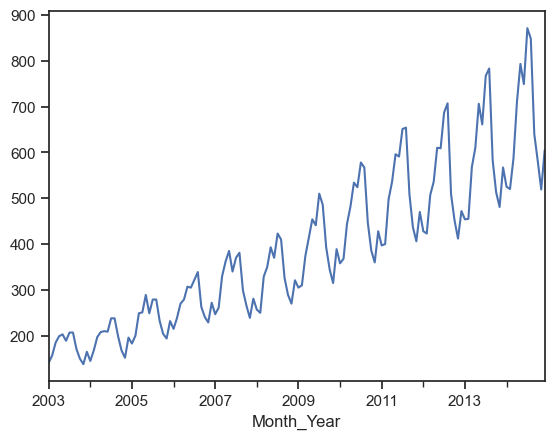

In [59]:
ts.plot()

In [60]:
pd.pivot_table?

Signature:
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'Hashable' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : list-like or scalar, optional
    Column or columns to aggregate.
index : column, Grouper, array, or list of the previous
    Keys to group by on the pivot table index. If a list is passed,
    it can contain any of the other types (except list). If an array is
    passed, it must be the same length as the data and will be used in
    the same manner as column values.
columns : column, Grouper, array, or list of the

In [62]:
pd.pivot_table(data = df,index = 'Year', columns = 'Month', values = 'Number_of_Tractor_Sold')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2003,141.0,157.0,185.0,199.0,203.0,189.0,207.0,207.0,171.0,150.0,138.0,165.0
2004,145.0,168.0,197.0,208.0,210.0,209.0,238.0,238.0,199.0,168.0,152.0,196.0
2005,183.0,200.0,249.0,251.0,289.0,249.0,279.0,279.0,232.0,204.0,194.0,232.0
2006,215.0,239.0,270.0,279.0,307.0,305.0,322.0,339.0,263.0,241.0,229.0,272.0
2007,247.0,261.0,330.0,362.0,385.0,340.0,370.0,381.0,299.0,266.0,239.0,281.0
2008,257.0,250.0,329.0,350.0,393.0,370.0,423.0,410.0,326.0,289.0,270.0,321.0
2009,305.0,310.0,374.0,414.0,454.0,441.0,510.0,486.0,393.0,345.0,315.0,389.0
2010,358.0,368.0,444.0,482.0,534.0,524.0,578.0,567.0,447.0,386.0,360.0,428.0
2011,397.0,400.0,498.0,536.0,596.0,591.0,651.0,654.0,509.0,437.0,406.0,470.0


<Axes: xlabel='Year'>

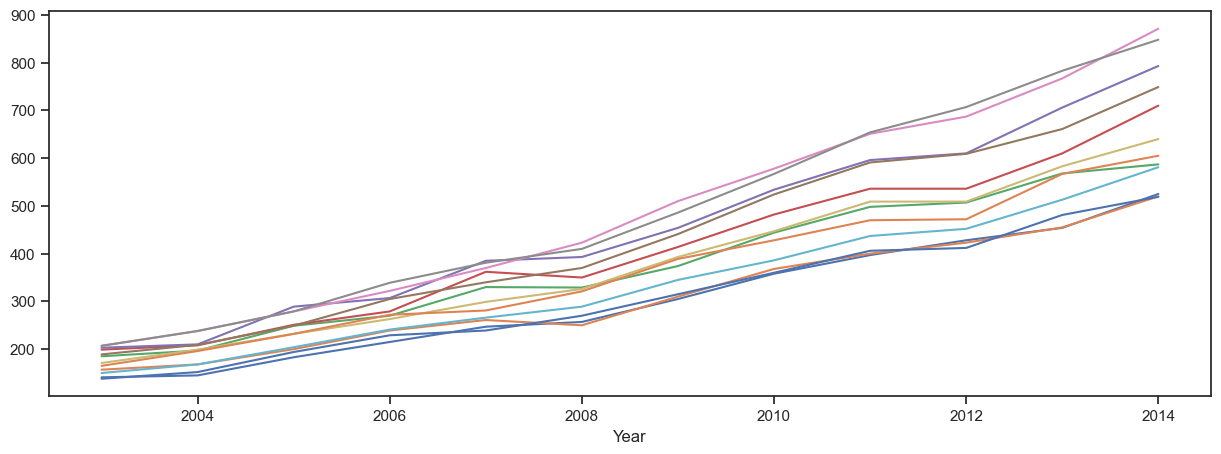

In [63]:
pd.pivot_table(data = df,index = 'Year', columns = 'Month', values = 'Number_of_Tractor_Sold').plot(legend = False, figsize = (15,5))

<Axes: xlabel='Month'>

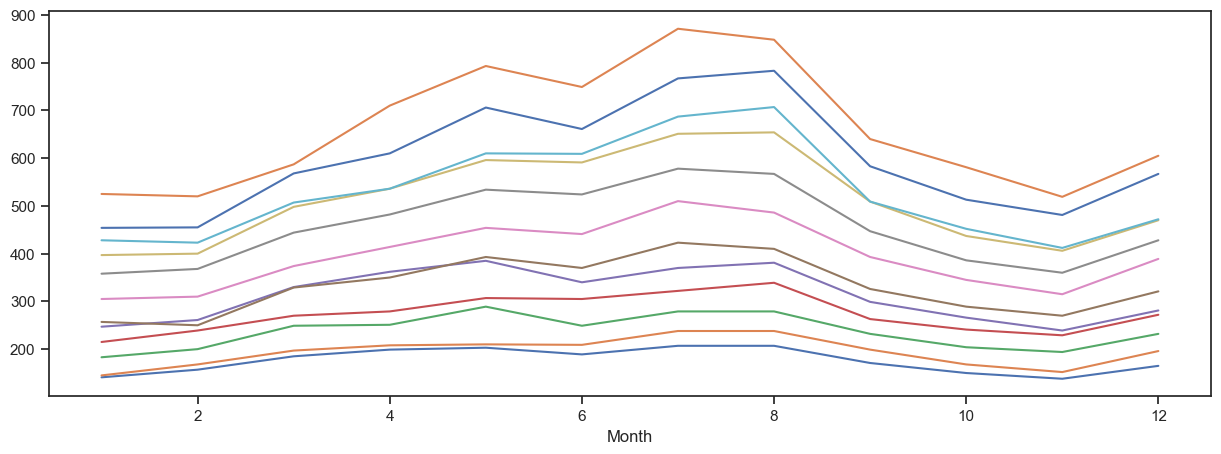

In [64]:
pd.pivot_table(data = df,index = 'Month', columns = 'Year', values = 'Number_of_Tractor_Sold').plot(legend = False, figsize = (15,5))

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
seasonal_decompose?

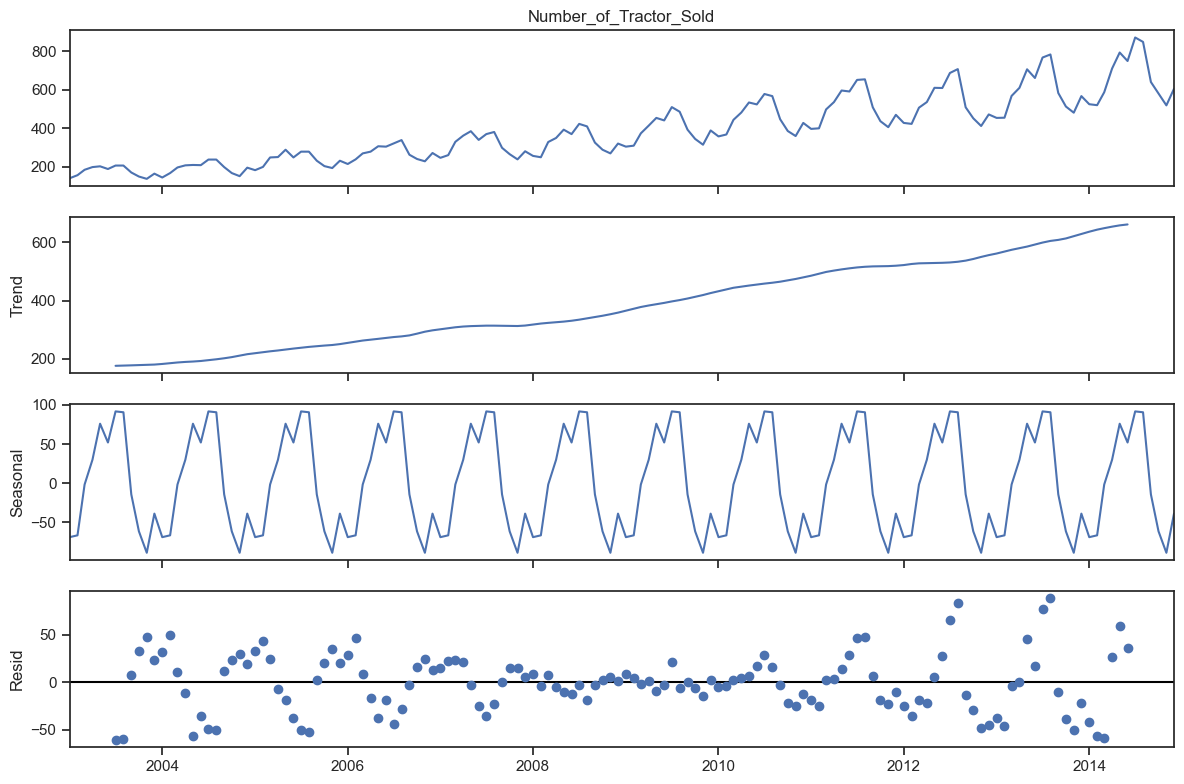

In [67]:
decom = seasonal_decompose(ts, model = 'additive')
fig = decom.plot()
fig.set_size_inches(12, 8)
fig.tight_layout()
plt.show()

In [68]:
decom.seasonal.head()

Month_Year
2003-01-01   -68.763889
2003-02-01   -66.434343
2003-03-01    -1.638889
2003-04-01    29.952020
2003-05-01    75.876263
Name: seasonal, dtype: float64

In [69]:
decomposed = pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis = 1).head()
decomposed.columns = ['Actual', 'Trend', 'Seasonality', 'Irregular']
decomposed

,Actual,Trend,Seasonality,Irregular
Month_Year,,,,
2003-01-01,141.0,NaN,-68.763889,NaN
2003-02-01,157.0,NaN,-66.434343,NaN
2003-03-01,185.0,NaN,-1.638889,NaN
2003-04-01,199.0,NaN,29.952020,NaN
2003-05-01,203.0,NaN,75.876263,NaN


In [70]:
! pip install stldecompose

# Seasonal - Trend decomposition using Loess(STL) :

In [71]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

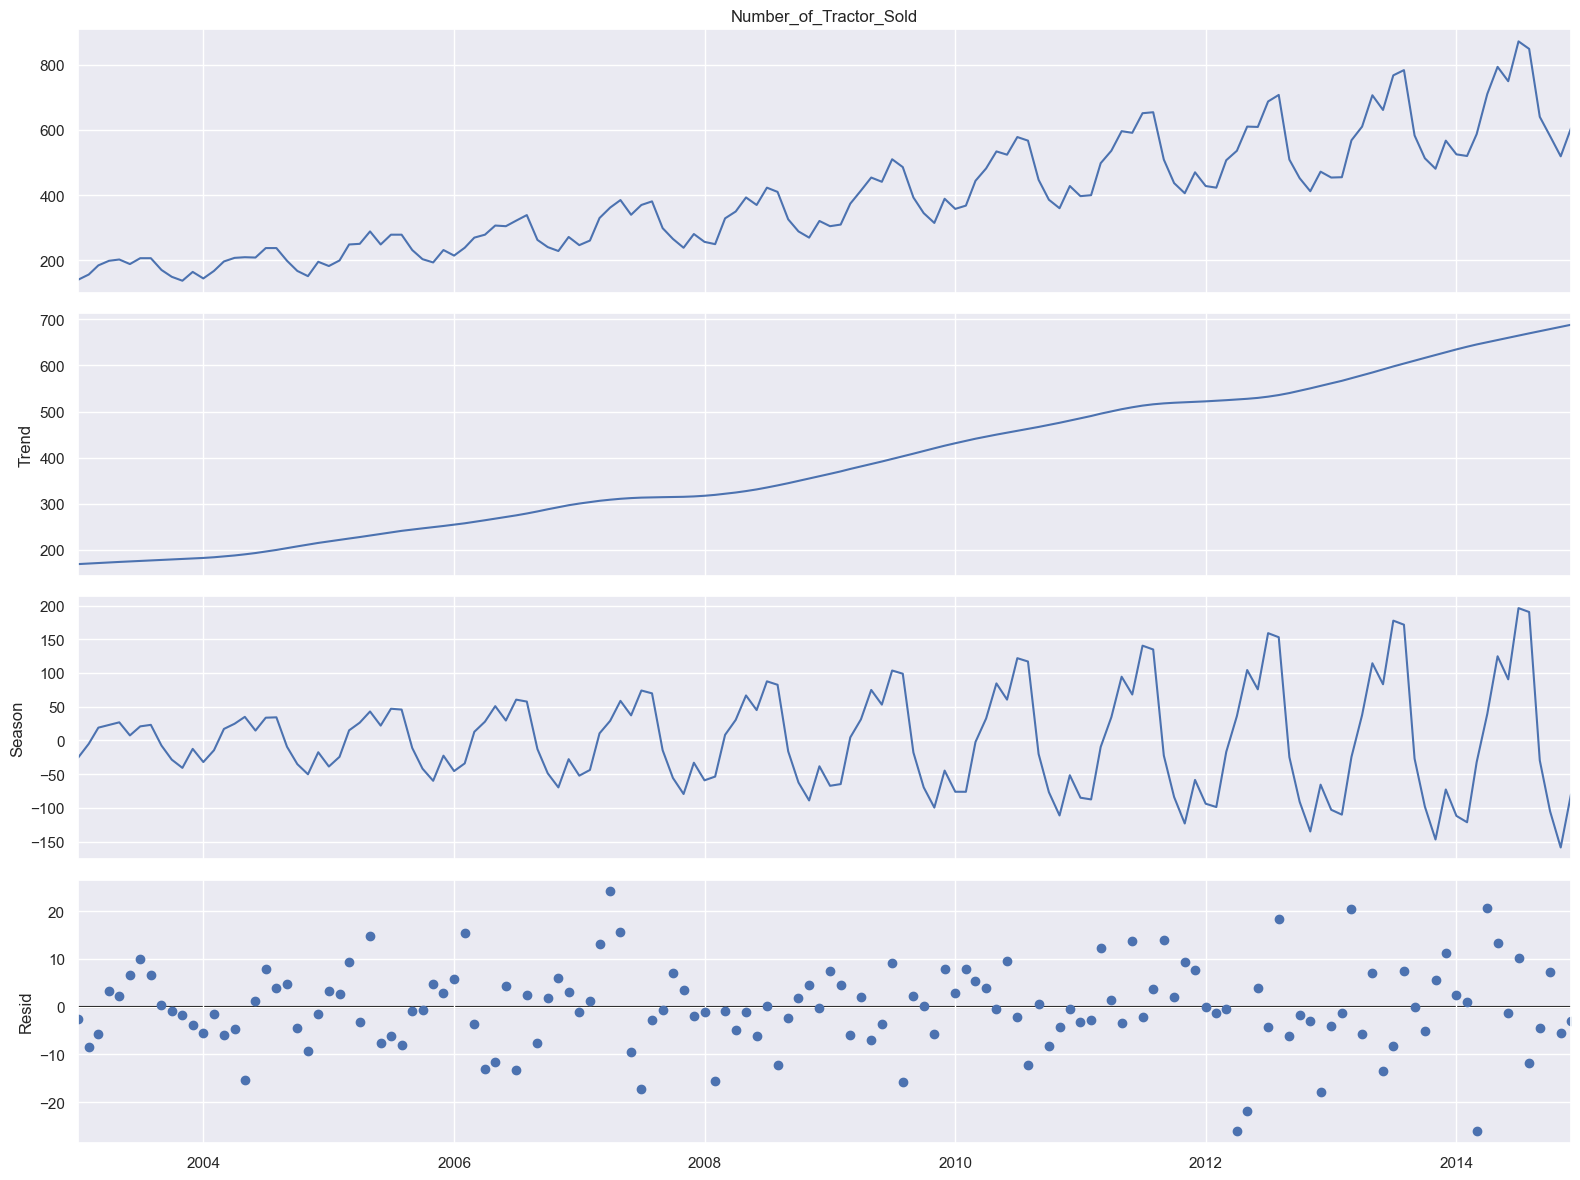

In [73]:
from statsmodels.tsa.seasonal import STL 

stl = STL(ts, seasonal = 13)
res = stl.fit()
fig = res.plot()

# Train - Test Split

In [76]:
train = df.Number_of_Tractor_Sold[ : '2014-06-01']
train

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
2003-06-01    189
2003-07-01    207
2003-08-01    207
2003-09-01    171
2003-10-01    150
2003-11-01    138
2003-12-01    165
2004-01-01    145
2004-02-01    168
2004-03-01    197
2004-04-01    208
2004-05-01    210
2004-06-01    209
2004-07-01    238
2004-08-01    238
2004-09-01    199
2004-10-01    168
2004-11-01    152
2004-12-01    196
2005-01-01    183
2005-02-01    200
2005-03-01    249
2005-04-01    251
2005-05-01    289
2005-06-01    249
2005-07-01    279
2005-08-01    279
2005-09-01    232
2005-10-01    204
2005-11-01    194
2005-12-01    232
2006-01-01    215
2006-02-01    239
2006-03-01    270
2006-04-01    279
2006-05-01    307
2006-06-01    305
2006-07-01    322
2006-08-01    339
2006-09-01    263
2006-10-01    241
2006-11-01    229
2006-12-01    272
2007-01-01    247
2007-02-01    261
2007-03-01    330
2007-04-01    362
2007-05-01    385
2007-06-01    340
2007-07-01    370

In [77]:
test = df.Number_of_Tractor_Sold['2014-07-01' : ]
test

Month_Year
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Number_of_Tractor_Sold, dtype: int64

In [78]:
decom_train = seasonal_decompose(train, period = 12)

In [79]:
decom_train.observed

Month_Year
2003-01-01    141.0
2003-02-01    157.0
2003-03-01    185.0
2003-04-01    199.0
2003-05-01    203.0
2003-06-01    189.0
2003-07-01    207.0
2003-08-01    207.0
2003-09-01    171.0
2003-10-01    150.0
2003-11-01    138.0
2003-12-01    165.0
2004-01-01    145.0
2004-02-01    168.0
2004-03-01    197.0
2004-04-01    208.0
2004-05-01    210.0
2004-06-01    209.0
2004-07-01    238.0
2004-08-01    238.0
2004-09-01    199.0
2004-10-01    168.0
2004-11-01    152.0
2004-12-01    196.0
2005-01-01    183.0
2005-02-01    200.0
2005-03-01    249.0
2005-04-01    251.0
2005-05-01    289.0
2005-06-01    249.0
2005-07-01    279.0
2005-08-01    279.0
2005-09-01    232.0
2005-10-01    204.0
2005-11-01    194.0
2005-12-01    232.0
2006-01-01    215.0
2006-02-01    239.0
2006-03-01    270.0
2006-04-01    279.0
2006-05-01    307.0
2006-06-01    305.0
2006-07-01    322.0
2006-08-01    339.0
2006-09-01    263.0
2006-10-01    241.0
2006-11-01    229.0
2006-12-01    272.0
2007-01-01    247.0
2007-02-0

In [80]:
decom_train.seasonal

Month_Year
2003-01-01   -64.874179
2003-02-01   -61.107513
2003-03-01     3.975821
2003-04-01    26.946654
2003-05-01    69.604987
2003-06-01    48.000821
2003-07-01    91.316730
2003-08-01    90.214457
2003-09-01   -14.501452
2003-10-01   -61.596149
2003-11-01   -88.948422
2003-12-01   -39.031755
2004-01-01   -64.874179
2004-02-01   -61.107513
2004-03-01     3.975821
2004-04-01    26.946654
2004-05-01    69.604987
2004-06-01    48.000821
2004-07-01    91.316730
2004-08-01    90.214457
2004-09-01   -14.501452
2004-10-01   -61.596149
2004-11-01   -88.948422
2004-12-01   -39.031755
2005-01-01   -64.874179
2005-02-01   -61.107513
2005-03-01     3.975821
2005-04-01    26.946654
2005-05-01    69.604987
2005-06-01    48.000821
2005-07-01    91.316730
2005-08-01    90.214457
2005-09-01   -14.501452
2005-10-01   -61.596149
2005-11-01   -88.948422
2005-12-01   -39.031755
2006-01-01   -64.874179
2006-02-01   -61.107513
2006-03-01     3.975821
2006-04-01    26.946654
2006-05-01    69.604987
2006-

In [ ]:
# Building a Model using ETS (Exponential Smoothening)

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [83]:
ets_model = ExponentialSmoothing(train, 
                                 trend='mul', 
                                 seasonal='mul', 
                                 seasonal_periods=12).fit(smoothing_level=0.1,     # alpha
                                                          smoothing_slope=0.6,     # beta
                                                          smoothing_seasonal=0.2   # gamma
                                                         )

C:\Users\VJahn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VJahn\AppData\Local\Temp\ipykernel_17856\2816982346.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  seasonal_periods=12).fit(smoothing_level=0.1,     # alpha
C:\Users\VJahn\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [86]:
ets_model.forecast(6)

2014-07-01    853.497244
2014-08-01    848.825617
2014-09-01    643.528443
2014-10-01    558.915553
2014-11-01    512.691698
2014-12-01    599.839924
Freq: MS, dtype: float64

In [87]:
test

Month_Year
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Number_of_Tractor_Sold, dtype: int64

In [88]:
np.abs(test.values - ets_model.forecast(6).values)/test.values

array([0.02009501, 0.0009736 , 0.00551319, 0.0380111 , 0.01215472,
       0.00852905])

In [89]:
np.mean(np.abs(test.values - ets_model.forecast(6).values)/test.values)

0.014212780829302296

In [ ]:
# SARIMA MODEL